**Tablas de datos disponibles en**


https://planeacionnacional-my.sharepoint.com/:f:/g/personal/lguevara_dnp_gov_co/EuTOoLTxGShOgh6vlNZ3H5YBFjsgM7_keVoE6czgLq1Reg?e=PggaMi

**Acceso a microdato y descripción de variables**


http://microdatos.dane.gov.co/index.php/catalog/456/get_microdata

# Encuesta Nacional de Calidad de Vidad 2016 - Módulos de Necesidades Jurídicas

* Con el propósito de conocer cómo los individuos percibem el acceso a la justicia se concibió la idea de realizar, dentro de la Encuesta Nacional de Calidad de Vida-ENCV 2016, un módulo de preguntas de necesidades jurídicas para Colombia. 

* Así, se busca conocer las barreras que los individuos encuentran en el sistema para fortalecer los mecanismos de atención y orientación a los usuarios de los servicios de justicia en todo el territorio nacional y superar las barreras territoriales y poblacionales para el goce efectivo de derechos de todos los habitantes del territorio.  

* El acceso a la justicia es uno de los objetivos para el desarrollo sostenible de las Naciones Unidas y es promovido por el Comité de Gobernanza Pública de la OECD. Colombia se ha propuesto mejorar las condiciones de acceso a la justicia, para lo cual, de manera prioritaria debe contar con información que permita diagnosticar su estado actual, definir metas y tomar decisiones de política pública. 

## 0. setup
* **tidyr** - reshapes de los módulos de necesidades jurídicas
* **plyr**  - appende de los módulos de necesidades jurídicas
* **data.table** - carga de tablas de datos de la ENCV 2016
* **openxslx** - carga de tablas auxiliares
* **virids** - paleta de colores para plots
* **ggplots** - plots de indicadores desagregados

In [19]:
library(tidyr)
library(plyr)
library(ggplot2)
library(viridis)
library(dplyr)
library(forcats)
library(hrbrthemes)

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see http://bit.ly/arialnarrow



## 1.tablas de datos
La información principal utilizada para la creación de los indicadores de necesidades jurídicas se deriva de los módulos de personas y vivienda.
La información de necesidades jurídicas esta dividida en dos módulos, uno de necesidades priorizadas y uno de necesidades concurrentes.

In [4]:
# 1. tablas de datos ----
# 1.1. personas
file1 <- '1OVTmAXCU2c2Ao1i1IFFwSKDqY-6X0aAs'
dt_car <- data.frame(data.table::fread(sprintf('https://docs.google.com/uc?id=%s&export=download', file1), header = T))

# 1.2. vivienda
file2 <- '197uraHFGwEdQv7CmSfF9ZA83qiR4nKse'
dt_viv <- data.frame(data.table::fread(sprintf('https://docs.google.com/uc?id=%s&export=download', file2), header = T))

# 1.3. nj priorizadas
file3 <- '1u5UzJ7SnUZwUTGwoTL-jmtnOnNZA-ZhQ'
nj1 <- data.frame(data.table::fread(sprintf('https://docs.google.com/uc?id=%s&export=download', file3), header = T))

# 1.4. nj concurrentes
file4 <- '1ozfsDyuCko-K1OvPbqY6Cbc-rs98Nxi-'
nj2 <- data.frame(data.table::fread(sprintf('https://docs.google.com/uc?id=%s&export=download', file4), header = T))


In [5]:
# 1.5. formato de nombre de variables
rm(file1,file2,file3,file4)
names(dt_car) <- tolower(names(dt_car))
names(dt_viv) <- tolower(names(dt_viv))
names(nj1) <- tolower(names(nj1))
names(nj2) <- tolower(names(nj2))

lapply(list(dt_car,dt_viv,nj1,nj2), function(x){head(x)})

,directorio,secuencia_encuesta,secuencia_p,nro_encuesta,orden,p6016,p6020,p6040,p6051,p5502,⋯,p6081,p6081s1,p6087,p6083,p6083s1,p6088,p6080,p5667,llavehog,fex_c
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
1,5000000,1,1,592,1,1,2,22,1,5,⋯,2,NA,6,2,NA,6,6,,50000001,828.8801
2,5000000,2,1,592,2,2,1,23,7,5,⋯,2,NA,4,2,NA,6,6,,50000001,828.8801
3,5000001,1,1,592,1,1,1,36,1,5,⋯,2,NA,9,3,NA,3,6,,50000011,347.9196
4,5000002,1,1,592,1,1,2,47,1,4,⋯,2,NA,1,3,NA,1,6,,50000021,723.1396
5,5000002,2,1,592,2,2,2,14,3,5,⋯,2,NA,3,1,1,NA,6,,50000021,723.1396
6,5000002,3,1,592,3,3,2,20,3,4,⋯,2,NA,3,1,1,NA,6,,50000021,723.1396
,directorio,nro_encuesta,secuencia_encuesta,secuencia_p,orden,p3,p5660,p1070,p4005,p4015,⋯,p5661s4,p5661s5,p5661s6,p5661s7,p5661s8,cant_hog_completos,p1_departamento,region,region_buenaventura,fex_c
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,5000000,590,1,1,1,1,01-09-2016 00:00:00,2,1,4,⋯,NA,NA,NA,NA,1,1,85,9,NA,828.8801


## 2. define marco de personas con componentes de hogar
Se crean las tablas con información auxiliar sociodemográfica básica

In [6]:
# 2. define marco de personas con componentes de hogar ----

# 2.1. prepara merge 
dt_per <- dt_car

dt_per$key_per <- paste0(dt_per$directorio,dt_per$secuencia_p,dt_per$secuencia_encuesta)
dt_per$key_hog <- paste0(dt_per$directorio,dt_per$secuencia_p)

print('todos los casos de vivienda en la tabla de personas?')
table(dt_viv$directorio %in% dt_per$directorio)

# 2.2. informacion de vivienda
dt_per <- merge(dt_per,dt_viv[c('p1_departamento','p3','directorio')],by = 'directorio', all.x = T)
print('algun registro de personas sin información de departamento?')
table(is.na(dt_per$p1_departamento))

# 2.3. subset de varibles de interes
dt_per <- dt_per[,c('key_per','key_hog','p1_departamento','p3','p6020','p6040','p6051','p6087','fex_c')]
print('registros duplicados en la llave de personas?')
table(duplicated(dt_per$key_per))

[1] "todos los casos de vivienda en la tabla de personas?"



 TRUE 
22454 

[1] "algun registro de personas sin información de departamento?"



FALSE 
74349 

[1] "registros duplicados en la llave de personas?"



FALSE 
74349 

## 3. asocia etiquetas a variables de interes
Se crean pegues con tablas de etiquetas de las principales vairiables de los módulos de vivienda y personas

In [7]:
# 3. asocia etiquetas a variables de interes ----

# 3.1. sexo - p6020
print('diagnostico de frecuencias de categorias de sexo')

#table(is.na(dt_per$p6020))
dt_per$p6020[which(dt_per$p6020 == 1)] <- 'Mujer'
dt_per$p6020[which(dt_per$p6020 == 2)] <- 'Hombre'

table(dt_per$p6020) 

# 3.2. educacion - p6087
file5 <- '1e8HdkCLf2xnu6xaIqaJv9OZ7wQAgAu3a'
edu_lab <- data.frame(openxlsx::read.xlsx(sprintf('https://docs.google.com/uc?id=%s&export=download', file5)))
edu_lab <- edu_lab[c('p6087','p6087_lab')]

print('diagnostico de frecuencias de categorias de educacion')

table(dt_per$p6087)
#table(is.na(dt_per$p6087))
dt_per$p6087[is.na(dt_per$p6087) == T] <- 999
dt_per <- merge(dt_per ,edu_lab, by = 'p6087',all.x = T)

table(dt_per$p6087_lab)

# 3.3. jefatura de hogar - p6051
file6 <- '1OVk0vt56zu4Yit4H9qpaGVYDi6bdHV8V'
hoh_lab <- data.frame(openxlsx::read.xlsx(sprintf('https://docs.google.com/uc?id=%s&export=download', file6)))
hoh_lab <- hoh_lab[c('p6051','p6051_lab')]


print('diagnostico de frecuencias dejefatura de hogar')
#table(is.na(dt_per$p6051))
dt_per <- merge(dt_per ,hoh_lab, by = 'p6051',all.x = T)
table(dt_per$p6051_lab)

# 3.4. clase - p3
print('diagnostico de frecuencias clase - urbano/rural')

#table(is.na(dt_per$p3));class((dt_per$p3))
dt_per$p3 <- as.numeric(dt_per$p3)

dt_per$p3_lab <- 0
dt_per$p3_lab[which(dt_per$p3 == 1)] <- 'Urbano'
dt_per$p3_lab[which(dt_per$p3 == 2)] <- 'Rural'
dt_per$p3_lab[which(dt_per$p3 == 3)] <- 'Rural'

table(dt_per$p3_lab)

# 3.5. departamentos y regiones - p1_departamento
print('diagnostico de frecuencias departamentos')
file7 <- '15M3e4O_aUcma_iZKrDnXgiUm8_eUE4pp'
dpt_lab <- data.frame(openxlsx::read.xlsx(sprintf('https://docs.google.com/uc?id=%s&export=download', file7)))

# table(is.na(dt_per$p1_departamento)); table(duplicated(dpt_lab$p1_departamento))
dt_per <- merge(dt_per ,dpt_lab, by = 'p1_departamento',all.x = T)
table(dt_per$lab_departamento)
# 3.6. remueve tablas auxiliares
rm(hoh_lab,dpt_lab,edu_lab,file5,file6,file7)

[1] "diagnostico de frecuencias de categorias de sexo"



Hombre  Mujer 
 38210  36139 

[1] "diagnostico de frecuencias de categorias de educacion"



    1     2     3     4     5     6     7     8     9    10 
15489  8307  3539  5029   176   573   239  1315  8581 11951 


               Algunos años de primaria              Algunos años de secundaria 
                                  15489                                    3539 
                                missing                                 Ninguno 
                                  19150                                    8581 
                                No sabe          Técnica o tecnológica completa 
                                  11951                                     573 
                       Toda la primaria                      Toda la secundaria 
                                   8307                                    5029 
                 Universitaria completa Uno o mas años de técnica o tecnológica 
                                   1315                                     176 
          Uno o mas años de universidad 
                                    239 

[1] "diagnostico de frecuencias dejefatura de hogar"



       Empleado(a) del servicio doméstico 
                                       88 
            Hermano (a), hermanastro (a)  
                                     1132 
                      Hijo(a) hijastro(a) 
                                    27131 
                       Jefe (a) del hogar 
                                    22893 
                                Nieto (a) 
                                     5363 
                            Otro pariente 
                                      850 
                Otro pariente del jefe(a) 
                                     1570 
      Padre, madre, padrastro y madrastra 
                                      917 
Pareja, esposo (a), cónyuge, compañero(a) 
                                    13053 
         Parientes del servicio doméstico 
                                       12 
                              Pensionista 
                                       61 
                          Suegro o suegra 
          

[1] "diagnostico de frecuencias clase - urbano/rural"



 Rural Urbano 
 29156  45193 

[1] "diagnostico de frecuencias departamentos"



                Amazonas                Antioquia                   Arauca 
                     197                     9675                      650 
               Atlántico                   Bogotá                  Bolívar 
                    2035                     5812                     1917 
                  Boyacá                   Caldas                  Caquetá 
                    2279                     1765                     1148 
                Casanare                    Cauca                    Cesar 
                     512                     4869                     1618 
                   Chocó                  Córdoba             Cundinamarca 
                    2051                     1896                     2335 
                   Huila               La Guajira                Magdalena 
                    1789                      950                     1737 
                    Meta                   Nariño       Norte de Santander 
           

## 4. modulo de necesidades juridicas priorizadas

In [8]:
# 4. modulo de necesidades juridicas priorizadas ----
print('frecuencia de grupos declarados')
#table(is.na(nj1$p1671))
table(nj1$p1671)

# 4.1. identificación de necesidades juridicias - p1671
nj1$p1671[(is.na(nj1$p1671)) == T] <- 0
nj1$nj_prio <- 0
nj1$nj_prio[nj1$p1671 != 0] <- 1

#sum(nj1$fex_c[which(nj1$nj_prio == 1)]) # almenos una nj -  3.404.820 

# 4.2. subset de variables de interes
nj1_prio <- nj1[c('directorio','secuencia_encuesta','secuencia_p','fex_c',grep('p1671', names(nj1), value = TRUE), 'p1684', 'p1685','p1672')]

# 4.3. formato long para las tipologias de nj
nj1_prio$key_per <- paste0(nj1_prio$directorio,nj1_prio$secuencia_p,nj1_prio$secuencia_encuesta)
#table(duplicated(nj1_prio$key_per))

nj1_prio <- gather(nj1_prio, tipo_prio, nj_prio, grep('p1671s', names(nj1_prio)), factor_key = TRUE)
nj1_prio <- nj1_prio[is.na(nj1_prio$nj_prio) == F,]
print('total de personas con almenos una nj')
round(sum(nj1_prio$fex_c),0)

# 4.4. identificadora de tipo de nj
nj1_prio$nj_class <- 1

head(nj1_prio)

print('personas duplicadas?')
table(duplicated(nj1_prio$key_per))

[1] "frecuencia de grupos declarados"



   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 886  444  426  132 1145  148   44  300  643   47  232   85   72  105   83 

[1] "total de personas con almenos una nj"


[1] 3404820

,directorio,secuencia_encuesta,secuencia_p,fex_c,p1671,p1684,p1685,p1672,key_per,tipo_prio,nj_prio,nj_class
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<fct>,<int>,<dbl>
9,5000004,2,1,207.2200,1,NA,2,2,500000412,p1671s1,15,1
48,5000029,7,1,2435.8765,1,1,1,1,500002917,p1671s1,11,1
217,5000107,1,1,1031.0284,1,1,1,1,500010711,p1671s1,14,1
223,5000110,3,1,635.5184,1,NA,2,5,500011013,p1671s1,11,1
310,5000153,1,1,578.8516,1,1,1,2,500015311,p1671s1,15,1
320,5000160,2,1,716.5296,1,1,1,2,500016012,p1671s1,11,1


[1] "personas duplicadas?"



FALSE 
 4792 

## 5. modulo de necesidades juridicas concurrentes

In [9]:
# 5. modulo de necesidades juridicas concurrentes ---- 

# 5.1. sub set de variables de interes
#names(nj2)
nj2_nopr <- nj2[c('directorio','secuencia_encuesta','secuencia_p','fex_c',grep('p1692', names(nj2), value = TRUE),'p1696','p1693')]

# 5.3. formato long para las tipologias de nj concurrentes
nj2_nopr$key_per <- paste0(nj2_nopr$directorio,nj2_nopr$secuencia_p,nj2_nopr$secuencia_encuesta)
nj2_nopr <- gather(nj2_nopr, tipo_prio, nj_prio, grep('p1692s', names(nj2_nopr)), factor_key = TRUE)
nj2_nopr <- nj2_nopr[is.na(nj2_nopr$nj_prio) == F,]

# 5.4. renombra catgorias de solucion y ruta
names(nj2_nopr)[names(nj2_nopr) == 'p1696'] <- 'p1685' # solucion
names(nj2_nopr)[names(nj2_nopr) == 'p1693'] <- 'p1672' # ruta
names(nj2_nopr)[names(nj2_nopr) == 'p1692'] <- 'p1671' # grupo de probelmas

# 5.5. identificadora de tipo de nj
nj2_nopr$nj_class <- 2

head(nj2_nopr)

print('personas duplicadas?')
table(duplicated(nj2_nopr$key_per))

,directorio,secuencia_encuesta,secuencia_p,fex_c,p1671,p1685,p1672,key_per,tipo_prio,nj_prio,nj_class
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<fct>,<int>,<dbl>
1,5000002,3,1,723.1396,1,1,2,500000213,p1692s1,13,2
2,5000002,3,1,723.1396,1,1,2,500000213,p1692s1,11,2
16,5000167,1,1,1744.0901,1,2,1,500016711,p1692s1,11,2
35,5000325,1,1,2199.3863,1,2,1,500032511,p1692s1,13,2
71,5000620,1,1,176.4315,1,2,1,500062011,p1692s1,14,2
78,5000720,4,1,246.5162,1,2,1,500072014,p1692s1,13,2


[1] "personas duplicadas?"



FALSE  TRUE 
  946   508 

## 6. append de necesiades juridicas

In [10]:
# 6. append de necesiades juridicas ----

nj2_nopr <- nj2_nopr[ , order(names(nj2_nopr))]
nj1_prio <- nj1_prio[ , order(names(nj1_prio))]

#table(names(nj2_nopr) %in% names(nj1_prio))

nj <- plyr::rbind.fill(nj1_prio,nj2_nopr)

# 6.1. etiquetas de grupos de necesidades jurídicas y grupos de problemas
file8 <- '1jRGaggzaYLW3B20boJMEJgS4QAdM0lcc'
nj_labs <- data.frame(openxlsx::read.xlsx(sprintf('https://docs.google.com/uc?id=%s&export=download', file8)))

nj_labs <- nj_labs[c('p1671s_lab','p1671s','p1671_lab')]
nj <- merge(nj,nj_labs, by.x = 'nj_prio', by.y = 'p1671s', all.x = T)
rm(nj_labs,file8)

# 6.2. puegue con marco de personas
#table(duplicated(nj$key_per)); table(duplicated(dt_per$key_per))
#table(nj$key_per %in% dt_per$key_per)

names(nj)[names(nj) == 'fex_c'] <- 'fex_c_nj'
nj <- merge(nj,dt_per,by = 'key_per',all.x = T)
nj <- nj[ , order(names(nj))]

print('variables en tabla consolidada')
names(nj)

print('frecuencia de grupos de problemas')
table(nj$p1671)
unique(nj$p1671_lab)

[1] "variables en tabla consolidada"


[1] "directorio"         "fex_c"              "fex_c_nj"          
 [4] "key_hog"            "key_per"            "lab_departamento"  
 [7] "lab_region"         "nj_class"           "nj_prio"           
[10] "p1_departamento"    "p1671"              "p1671_lab"         
[13] "p1671s_lab"         "p1672"              "p1684"             
[16] "p1685"              "p3"                 "p3_lab"            
[19] "p6020"              "p6040"              "p6051"             
[22] "p6051_lab"          "p6087"              "p6087_lab"         
[25] "secuencia_encuesta" "secuencia_p"        "tipo_prio"

[1] "frecuencia de grupos de problemas"



   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 994  658  570  171 1376  206   64  453  785   80  304  120   92  211  162 

[1] "1 Familiares? "                                                                                                                              
 [2] "5 La prestacion de servicios de salud (afiliacion, citas, medicamentos)?"                                                                    
 [3] "9 Delitos (robos, corrupcion, lesiones personales)?"                                                                                         
 [4] "8 Deudas (falta de pago, tarjetas de credito, intereses)?"                                                                                   
 [5] "12 El Estado (impuestos, tramites, danos por el Estado)?"                                                                                    
 [6] "2 La prestacion de servicios publicos domiciliarios (tarifas, prestacion del servicio, desconexion)? "                                       
 [7] "14 La compra de productos, prestacion de servicios de telefonia y transporte publico (calidad de productos adquiridos, celular, busestaxis)?"
 [8] "3 Sus vecinos? "                                                                                                                             
 [9] "15 El medio ambiente o el espacio publico (ocupacion calles, obras publicas, contaminacion ambiental)?"                                      
[10] "11 El orden publico o conflicto armado (desplazamiento, cultivos ilicitos, conflicto armado)? "                                              
[11] "7 La prestacion de servicios de educacion (Acceso a la escuela, utiles escolares, matoneo)?"                                                 
[12] "10 Trato discriminatorio (orientacion sexual, mujer, raza)?"                                                                                 
[13] "13 La tenencia de tierras o el campo (titulacion, linderos, recuperacion de tierras particulares o del Estado)? "                            
[14] "6 Su empleador, en su lugar de trabajo o laborales (pagos, sindicatos, maltrato)? "                                                          
[15] "4 Su casa, apartamento, local o finca (ocupacion, danos, arrendamiento)?"

## 7. indicadores

In [11]:
# 7. indicadores ----

# 7.1. Personas con almenos una necesidad jurídica
p_nj_p <- sum(nj$fex_c_nj[which(nj$nj_class == 1)])
print('Personas con almenos una necesidad jurídica')
print(p_nj_p)

# 7.2. Personas con mas de una necesidad juridica
p_nj_c <- nj[which(nj$nj_class == 2),]
p_nj_c <- p_nj_c[!duplicated(p_nj_c$key_per),]
p_nj_c <- sum(p_nj_c$fex_c_nj)

print('Personas con mas de una necesidad juridica')
print(p_nj_c)

# 7.3. Declaración de necesidades juridicas
d_nj_p <- p_nj_p/sum(dt_per$fex_c[which(dt_per$p6040 > 17)])

print('Declaración de necesidades juridicas')
print(paste0((round(d_nj_p,3)*100),'%'))

# 7.4. Proporcion de necesidades juridicas satisfechas
nj_s <- table(nj$p1685)[1]/nrow(nj)

print('Proporcion de necesidades juridicas satisfechas')
print(paste0((round(nj_s,3)*100),'%'))

# 7.5. Proporcion de necesidades juridicas insatisfechas
nj_i <- table(nj$p1685)[2]/nrow(nj)

print('Proporcion de necesidades juridicas insatisfechas')
print(paste0((round(nj_i,3)*100),'%'))

# 7.6. Personas con necesidades juridicas priorizadas satisfechas 
p_nj_p_s <- sum(nj$fex_c_nj[which(nj$nj_class == 1 & nj$p1685 == 1 )]) / p_nj_p

print('Personas con necesidades juridicas priorizadas satisfechas')
print(paste0((round(p_nj_p_s,3)*100),'%'))

# 7.7. Personas con necesidades juridicas priorizadas insatisfechas 
p_nj_p_i <- (1 - p_nj_p_s)

print('Personas con necesidades juridicas priorizadas insatisfechas')
print(paste0((round(p_nj_p_i,3)*100),'%'))

[1] "Personas con almenos una necesidad jurídica"
[1] 3404820
[1] "Personas con mas de una necesidad juridica"
[1] 722394
[1] "Declaración de necesidades juridicas"
[1] "10.3%"
[1] "Proporcion de necesidades juridicas satisfechas"
[1] "39.9%"
[1] "Proporcion de necesidades juridicas insatisfechas"
[1] "60.1%"
[1] "Personas con necesidades juridicas priorizadas satisfechas"
[1] "40.9%"
[1] "Personas con necesidades juridicas priorizadas insatisfechas"
[1] "59.1%"


## 8. otras agregaciones

### 8.1. Necesidades juridicas priorizadas según grupo por cada 100 habitantes

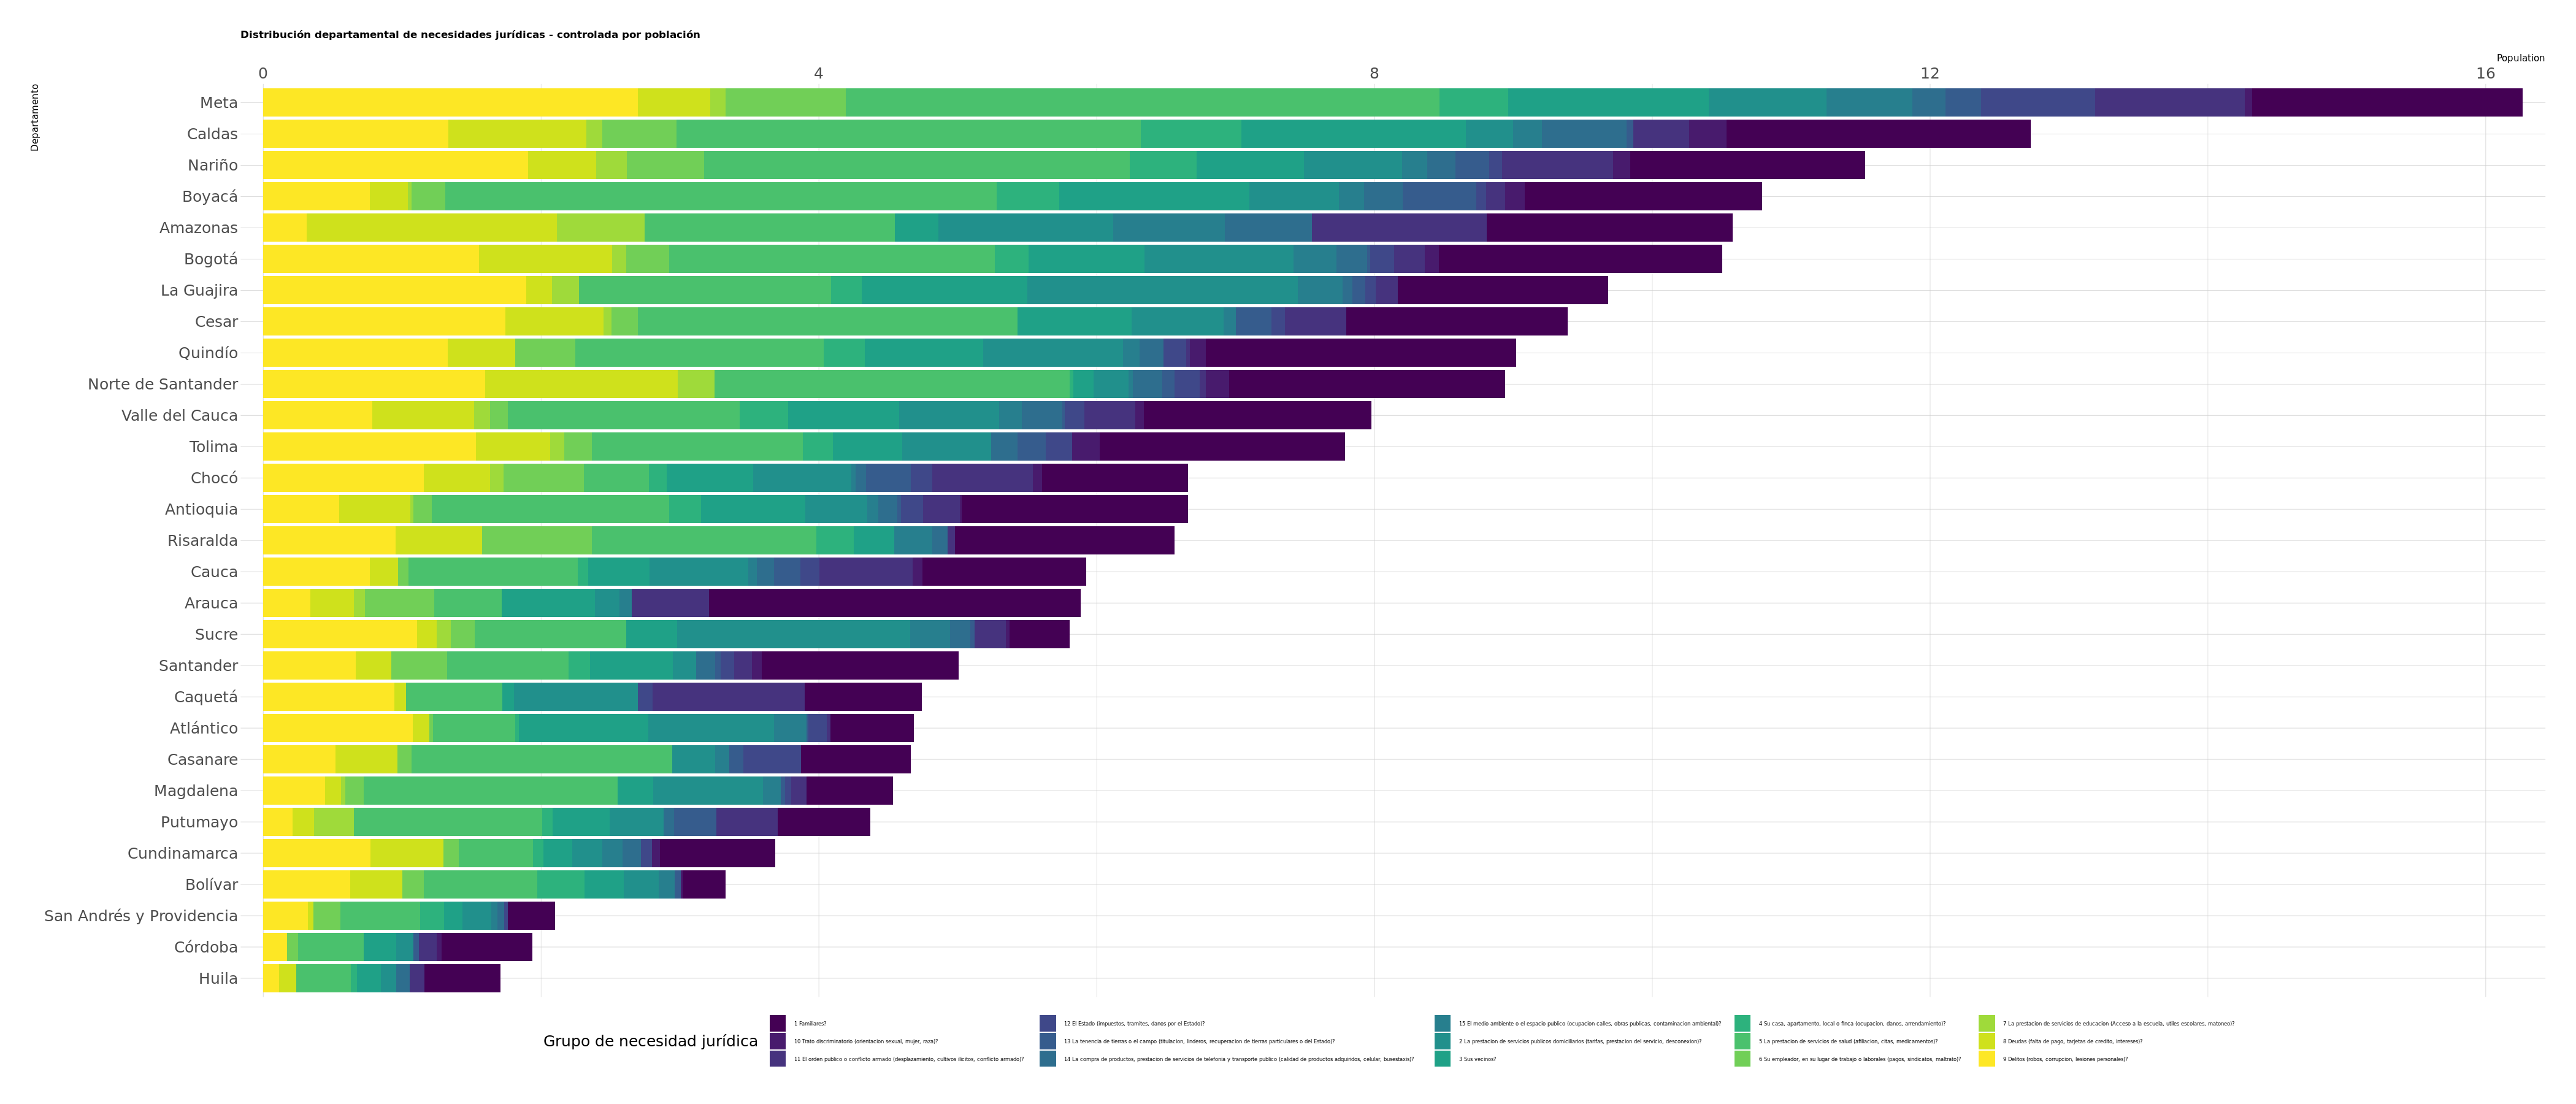

In [41]:
dt_ga <- doBy::summaryBy(fex_c ~ lab_departamento + p1_departamento + p1671_lab, FUN = sum, data = nj[nj$nj_class == 1,])
file9 <- '1OU99PME7RTqodhPdJntQdq2iKcGy6OsK'
pob <- data.frame(openxlsx::read.xlsx(sprintf('https://docs.google.com/uc?id=%s&export=download', file9)))

dt_ga <- merge(dt_ga,pob,all.x = T)
dt_ga$nj_in <- (dt_ga$fex_c.sum / dt_ga$total) * 100

size <- options(repr.plot.width=35, repr.plot.height= 15)

count(dt_ga, lab_departamento, p1671_lab, wt = nj_in, sort = TRUE) %>%
  mutate(lab_departamento = fct_reorder(lab_departamento, n, sum, .desc = FALSE)) %>%
  ggplot(aes(lab_departamento, n , fill = p1671_lab)) +
  geom_col() +
  scale_fill_viridis_d(name = 'Grupo de necesidad jurídica') +
  theme_ipsum() +
  coord_flip() +
scale_y_comma(position = "right") +
  theme(legend.position = "bottom") +
  theme(axis.text.y = element_text(size = 15)) +
  theme(axis.text.x = element_text(size = 15)) +
  theme(legend.title = element_text(size = 15),
        legend.text  = element_text(size = 5)) +
  ylab('Population') +
  xlab('Departamento') +
  ggtitle("Distribución departamental de necesidades jurídicas - controlada por población") +
  theme(plot.title = element_text(size = 10)) 
rm(file9)

options(size)

### 8.2. Necesidades juridicas priorizadas por región

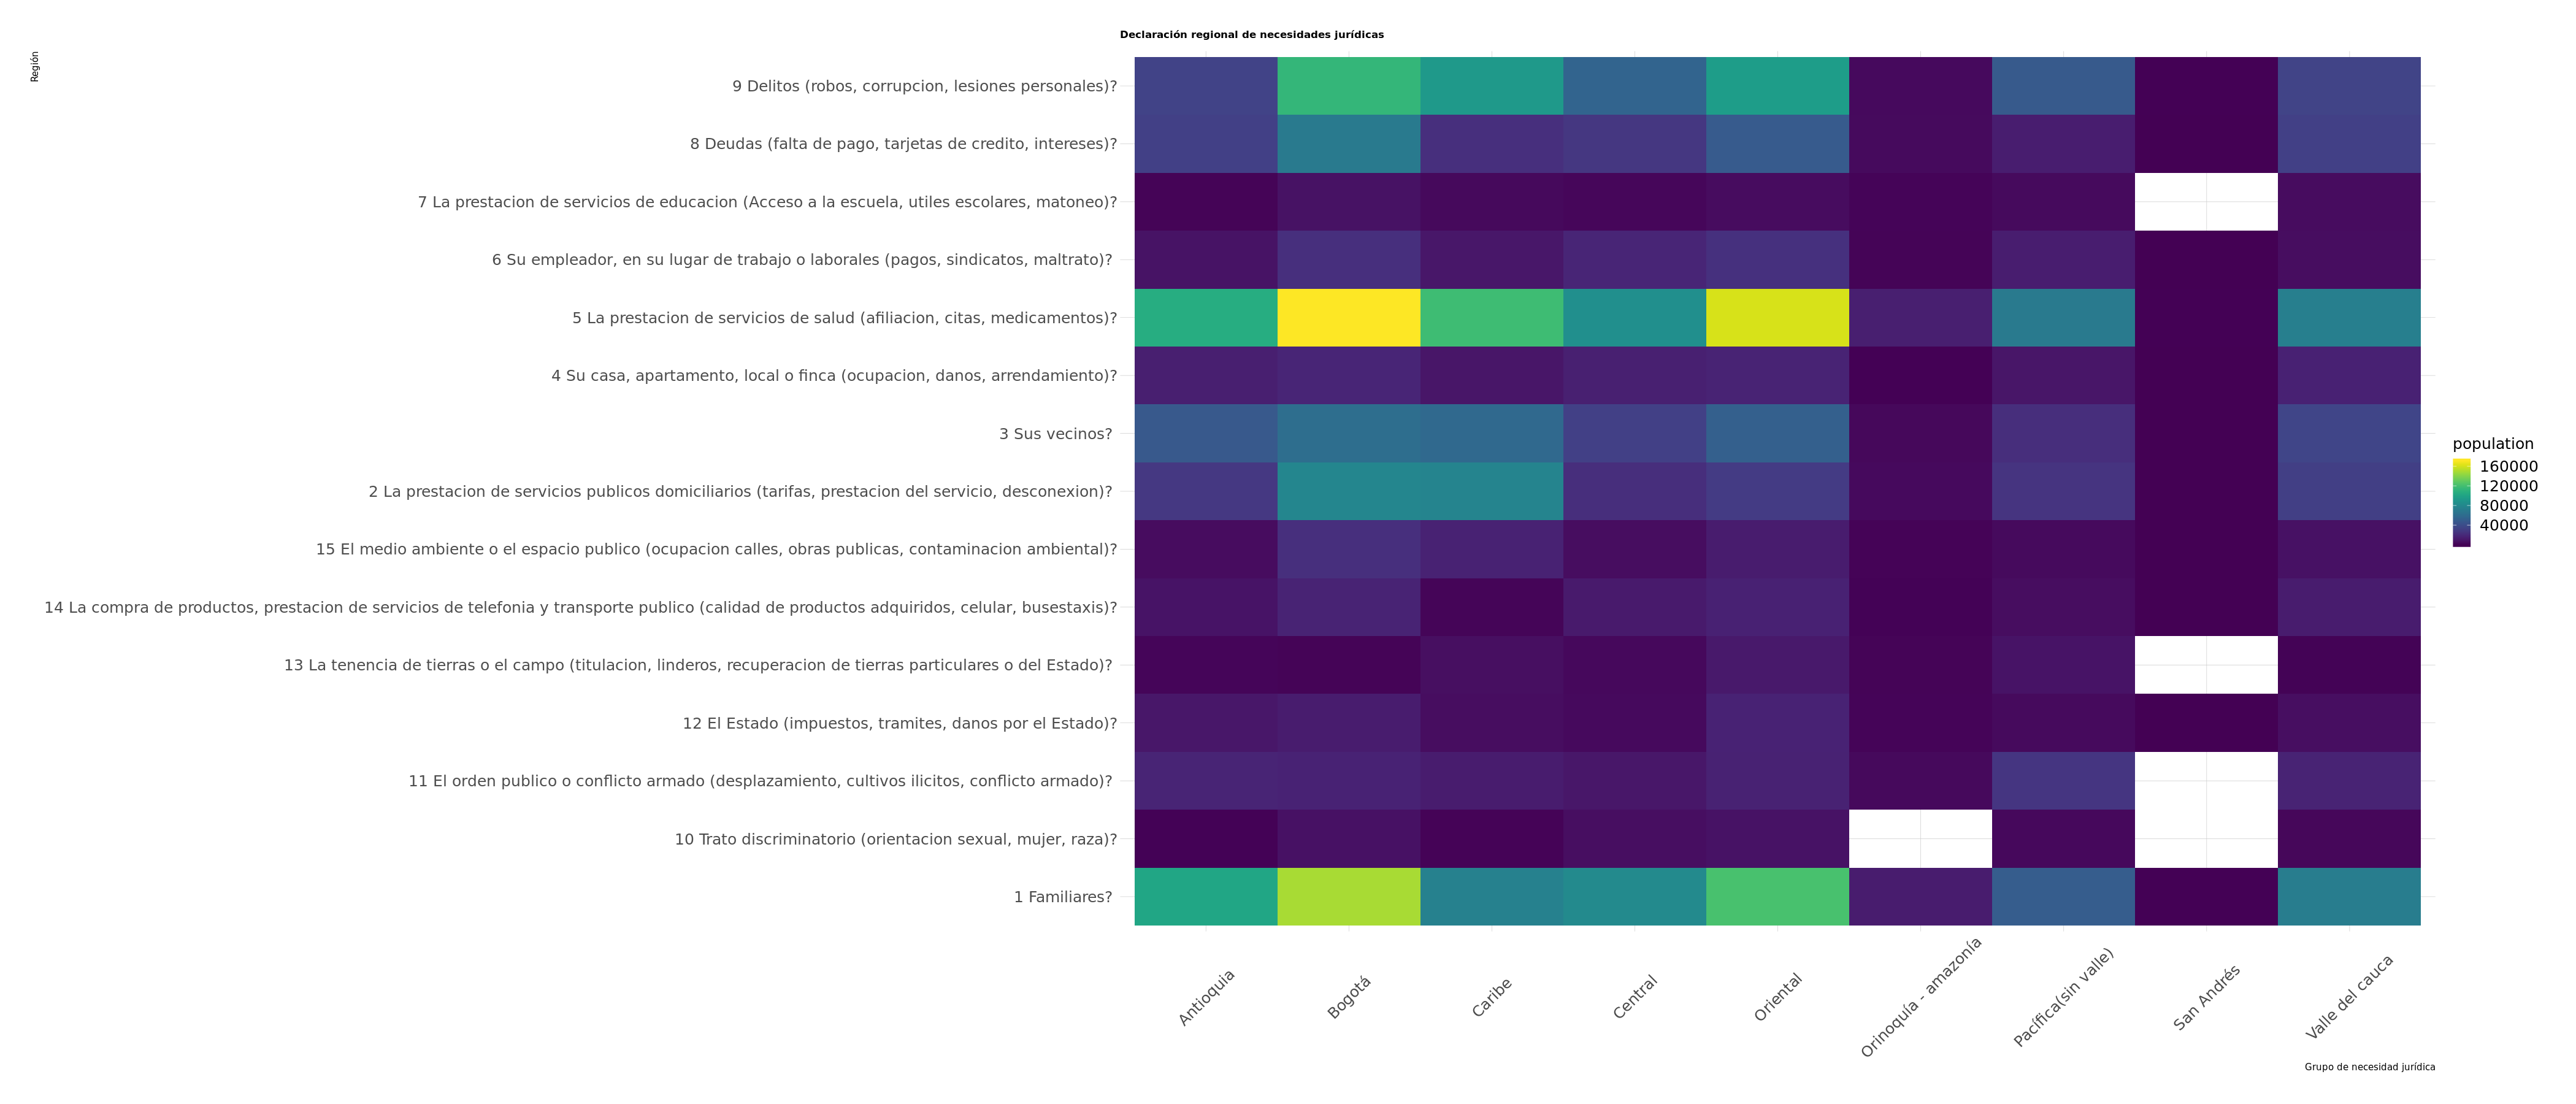

In [39]:
dt_ga <- doBy::summaryBy(fex_c ~ lab_region + p1671_lab, FUN = sum, data = nj[nj$nj_class == 1,])

size <- options(repr.plot.width=35, repr.plot.height= 15)
ggplot(dt_ga, aes(x = lab_region, y = p1671_lab, fill = fex_c.sum)) + 
  geom_tile() +
  scale_fill_viridis(name = 'population') + 
  theme_ipsum() +
  ylab('Región') +
  xlab('Grupo de necesidad jurídica') +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust = 0.5 , size = 15)) +
  theme(axis.text.y = element_text(size = 15)) +
  theme(legend.text = element_text(size = 15)) +
  theme(legend.text = element_text(size = 15)) +
  theme(legend.title = element_text(size = 15),
        legend.text  = element_text(size = 15)) +
  ggtitle("Declaración regional de necesidades jurídicas ") +
  theme(plot.title = element_text(size = 10)) 
options(size)